<a href="https://colab.research.google.com/github/Samikshab99/Global-Terrorism-Analysis-EDA/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [4]:
path = '/content/drive/MyDrive/'

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Global Terrorism Analysis EDA/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
data = pd.read_csv(path + 'Global Terrorism Data.csv', encoding='latin-1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
df.info(verbose = True,null_counts = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

In [9]:
columns_to_use = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'success' , 'suicide' , 'attacktype1_txt' , 'targtype1_txt', 'gname' , 'weaptype1_txt' , 'nkill', 'nwound', 'propextent_txt' , 'propvalue' , 'ransompaid'  ]

In [10]:
len(columns_to_use)

17

In [11]:
columns_to_use

['eventid',
 'iyear',
 'imonth',
 'iday',
 'country_txt',
 'region_txt',
 'success',
 'suicide',
 'attacktype1_txt',
 'targtype1_txt',
 'gname',
 'weaptype1_txt',
 'nkill',
 'nwound',
 'propextent_txt',
 'propvalue',
 'ransompaid']

In [12]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
df.shape

(181691, 135)

In [14]:
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [21]:
pd.set_option('display.max_columns', None)

In [15]:
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [22]:
new_df = df[columns_to_use]

In [23]:
new_df['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [24]:
new_df.country_txt.nunique()

205

In [25]:
new_df.region_txt.nunique()

12

In [26]:
new_df.region_txt.unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [27]:
 #Unique values in type of attack
new_df.attacktype1_txt.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [28]:
 #getting rid of all uknown values in complete dataframe
new_df = new_df.replace(['Unknown'],None)

In [29]:
new_df['attacktype1_txt'] = new_df['attacktype1_txt'].replace(['Hostage Taking (Kidnapping)','Hostage Taking (Barricade Incident)'],['Hostage Taking','Hostage Taking'])

In [30]:
new_df.attacktype1_txt.unique()

array(['Assassination', 'Hostage Taking', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking',
       'Unarmed Assault'], dtype=object)

In [31]:
new_df.targtype1_txt.unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Transportation', 'Tourists',
       'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [32]:
new_df.targtype1_txt.nunique()

21

## The Global Terrorism Database (GTD) provides information on terrorist attacks that have been documented in the news since 1970. Curated by The National Consortium for the Study of Terrorism and Responses to Terrorism , this database indicates terrorist attack per region. Figure  shows number of terrorist attack per region .

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


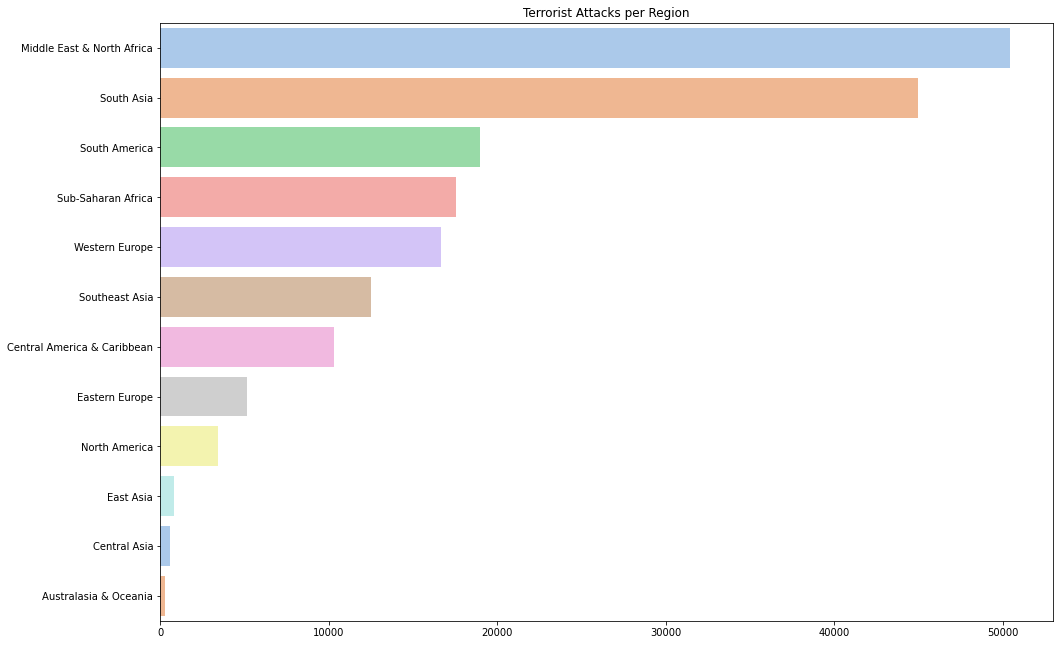

In [33]:
#Finding number of terrorist attack per region

#Describing the layout of figure
plt.subplots(figsize=(16,11))
sns.barplot(df['region_txt'].value_counts()[:20].values,df['region_txt'].value_counts()[:20].index,palette='pastel')
plt.title('Terrorist Attacks per Region')
plt.show()


## Now, let see which are the top 5 region in which number of terrorist attacks were more as compared to other region and how the terrorist attacks increased over the years .

---



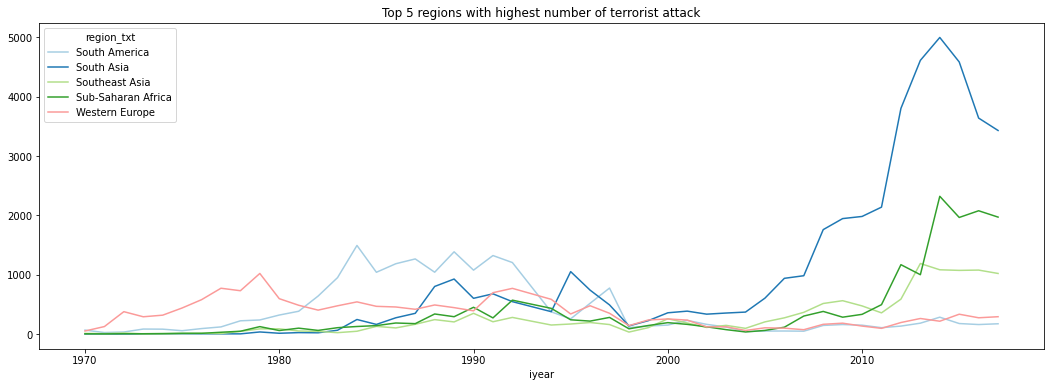

In [38]:
#Finding  top 5 region with highest terrorist attack.

top_regions=df[df['region_txt'].isin(df['region_txt'].value_counts()[1:6].index)]
pd.crosstab(top_regions.iyear,top_regions.region_txt).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Top 5 regions with highest number of terrorist attack')
plt.show()

## From above figure we can see that South America was the region with highest number of attack till year 2000 after that South Asia was the region which observed the highest number of attack.

## Now ,lets figure out which was the region with highest terrorist attack and the region with lowest number of terrorist attack.

In [34]:
#Finding the region with highest and lowest terrorist attack
terr=data.groupby(['region_txt'],as_index=False).count()

max_count=terr['iyear'].max()
max_id=terr['iyear'].idxmax()
max_name=terr['region_txt'][max_id]

min_count=terr['iyear'].min()
min_id=terr['iyear'].idxmin()
min_name=terr['region_txt'][min_id]

In [35]:
#Printing the region with highest and lowest terrorist attack
print(max_name,'has suffered the maximum number of terrorist attacks of',max_count,'.')
print(min_name,'has suffered the minimum number of terrorist attacks of',min_count,'.')

Middle East & North Africa has suffered the maximum number of terrorist attacks of 50474 .
Australasia & Oceania has suffered the minimum number of terrorist attacks of 282 .


## As we know number of terrorist attack in region and country , so now lets find which type of terrorist attack were happend during war.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


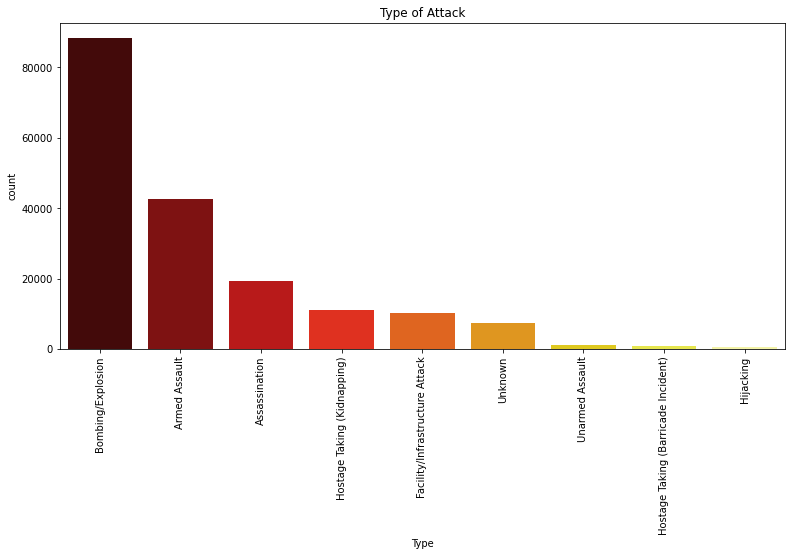

In [40]:
#Finding the type of terrorist attack and ploting the graph
plt.figure(figsize=(13,6))
sns.countplot(data['attacktype1_txt'],order=data['attacktype1_txt'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Attack')
plt.show()

## From above we can see that there were many type of attack which happened during the war among which bombing/explosion has the highest number of count whereas hijaking has the lowest number of count.

## When the war take place the terrorist always have there target fixed like wheather they want to attack military or goverment or religious places. So lets find out which were the type of target.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


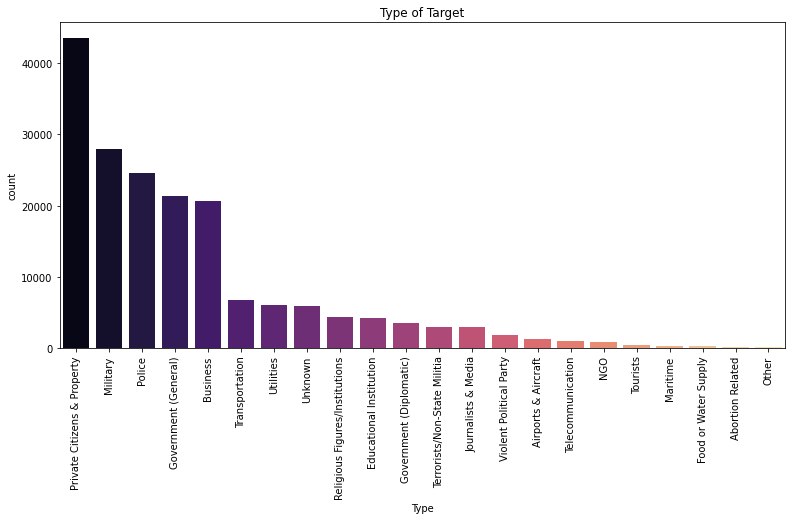

In [41]:
plt.figure(figsize=(13,6))
sns.countplot(data['targtype1_txt'],order=data['targtype1_txt'].value_counts().index,
              palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

## From above, we can see private citizens & property were the most targeted type followed by military and police. 

In [1]:
#Before and after the War on Terror
data_after = data[data['iyear']>=1970]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
#ax[0] = pd.crosstab(data.iyear,data.region_txt).plot(ax=ax[0])
#ax[0].set_title('Change in Regions per Year')
#
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=1970,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(data_after.iyear,data_after.region_txt).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('Attacks from (1970-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()


NameError: ignored

# number of attack in 1970 to  2017 

In [36]:
#Number of Attacks happened in 1970 and 2017
iyear=data.iyear.value_counts().to_dict()

print('The number of attacks happended in 1970 are',iyear[1970],'& the number of attacks happended in 2017 are ',iyear[2017])

# Number  of Attack  increased from 1970 till 2017 in percentage
rate=((iyear[2017]-iyear[1970])/iyear[2017])*100
print('So we can see that the number of attack from 1970 till 2017 has increased by ',np.round(rate,0))

The number of attacks happended in 1970 are 651 & the number of attacks happended in 2017 are  10900
So we can see that the number of attack from 1970 till 2017 has increased by  94.0
